In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import numpy as np

# Validation
from sklearn.model_selection import train_test_split

# t-SNE
from sklearn.manifold import TSNE

# Append system path to look for additional modules (needed for rcca)
import sys
sys.path.append("/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Packages/")
sys.path.append("/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/kim_code/")

# Import self-build script
import radiogenomics as r

# Import rcca module/script
import rcca

#Plotly 
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

/Users/kimrants/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [5]:
# Clinical
df_clinical = pd.read_excel('/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Input_Data/clinical_data.xlsx')
df_clinical = df_clinical.set_index('TCIA', drop=True)

# Bakas

In [27]:
TCGA_57 = pd.read_csv('/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Output_Data/Bakas57subjects/9genes_11img/TCGA_(57,11)')
TCGA_57 = TCGA_57.set_index('ID', drop=True)

In [35]:
df_bakas = pd.concat([df_clinical, TCGA_57], axis=1)
df_bakas = df_bakas.dropna(axis=0)
df_bakas['GBM Type'] = df_bakas.apply(lambda row: 'Primary' if (row['IDH1'] == 0) else 'Secondary', axis=1)
df_bakas['Gender'] = [i.capitalize() for i in list(df_bakas['Gender'])] # Do capitalization

In [71]:
print(df_bakas.shape)
#df_bakas

c = 0 
for i in list(df_bakas['Gender']):
    if i == "Female":
        c+=1
print(c)

print(np.mean(df_bakas['Age (scan time)']))

(57, 12)
21
59.98135063686616


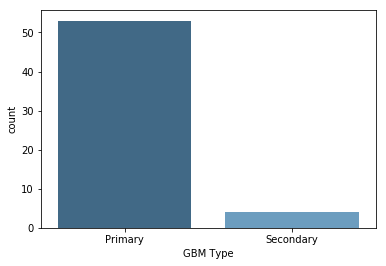

In [37]:
sns.countplot(x='GBM Type', 
              data=df_bakas, 
              palette="Blues_d")

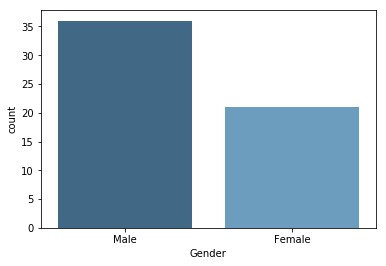

In [38]:
sns.countplot(x='Gender', 
              data=df_bakas, 
              palette="Blues_d")

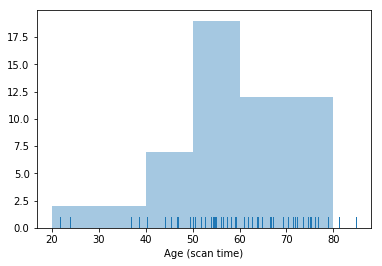

In [69]:
x = df_bakas['Age (scan time)']
sns.distplot(x, kde=False, rug=True, bins=[20,30, 40, 50,60,70,80]);

# OwnExtraction

In [57]:
TCGA_35 = pd.read_csv('/Users/kimrants/PycharmProjects/thesis_code/Thesis_code/Output_Data/OwnFeatures/9genes_11img/TCGA_(35,11)')
TCGA_35 = TCGA_35.set_index('ID', drop=True)

df_Own = pd.concat([df_clinical, TCGA_35], axis=1)
df_Own = df_Own.dropna(axis=0)
df_Own['GBM Type'] = df_Own.apply(lambda row: 'Primary' if (row['IDH1'] == 0) else 'Secondary', axis=1)
df_Own['Gender'] = [i.capitalize() for i in list(df_Own['Gender'])] # Do capitalization
print(df_Own.shape)
df_Own

(35, 12)


Age (scan time)  Gender  TP53  PTEN  NF1  EGFR  IDH1  PIK3R1  \
TCGA-02-0033        54.986301    Male   1.0   0.0  0.0   0.0   0.0     0.0   
TCGA-02-0047        78.791781    Male   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-0119        81.112329  Female   0.0   0.0  1.0   0.0   0.0     0.0   
TCGA-06-0122        84.843836  Female   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-0130        54.279452    Male   1.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-0137        63.761644  Female   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-0139        40.353425    Male   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-0142        81.210959    Male   0.0   0.0  0.0   1.0   0.0     0.0   
TCGA-06-0145        53.865753  Female   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-0154        54.843836    Male   0.0   0.0  0.0   1.0   0.0     0.0   
TCGA-06-0158        73.578082    Male   0.0   0.0  0.0   1.0   0.0     0.0   
TCGA-06-0187        69.364384    Male   0.0   1.0  0.0   0.0   0.0     0.0   
TCGA-06-0190        62.561644    Male   1.0   1.0  1.0   0.0   0.0     0.0   
TCGA-06-0238        46.676712    Male   1.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-0240        57.361644    Male   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-0646        61.021918    Male   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-06-5408        54.967123  Female   0.0   0.0  1.0   0.0   0.0     0.0   
TCGA-12-0616        36.852055  Female   0.0   0.0  0.0   1.0   0.0     0.0   
TCGA-12-0829        75.263014    Male   0.0   0.0  0.0   1.0   0.0     0.0   
TCGA-12-1598        75.972603  Female   1.0   1.0  0.0   0.0   0.0     0.0   
TCGA-12-3650        46.953425    Male   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-14-0790        64.860274  Female   0.0   0.0  0.0   1.0   0.0     1.0   
TCGA-14-1794        59.254795    Male   1.0   1.0  0.0   0.0   0.0     0.0   
TCGA-14-1825        70.367123    Male   1.0   0.0  0.0   0.0   0.0     0.0   
TCGA-19-1789        69.265753  Female   0.0   0.0  0.0   1.0   0.0     0.0   
TCGA-19-2624        51.756164    Male   0.0   0.0  0.0   1.0   0.0     0.0   
TCGA-19-2631        74.520548  Female   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-19-5951        76.698630  Female   0.0   0.0  0.0   0.0   0.0     1.0   
TCGA-76-4932        50.501370  Female   0.0   0.0  0.0   0.0   0.0     0.0   
TCGA-76-4934        66.627397  Female   1.0   1.0  0.0   0.0   0.0     0.0   
TCGA-76-6193        78.745205    Male   1.0   0.0  0.0   0.0   0.0     0.0   
TCGA-76-6280        57.345205    Male   0.0   0.0  0.0   0.0   0.0     1.0   
TCGA-76-6282        63.898630    Male   0.0   0.0  0.0   1.0   0.0     0.0   
TCGA-76-6656        66.479452    Male   0.0   0.0  0.0   1.0   0.0     1.0   
TCGA-76-6657        74.906849    Male   0.0   1.0  1.0   0.0   0.0     1.0   

              RB1  PIK3CA  PDGFRA GBM Type  
TCGA-02-0033  1.0     1.0     0.0  Primary  
TCGA-02-0047  0.0     1.0     1.0  Primary  
TCGA-06-0119  0.0     0.0     0.0  Primary  
TCGA-06-0122  0.0     0.0     0.0  Primary  
TCGA-06-0130  1.0     0.0     0.0  Primary  
TCGA-06-0137  0.0     0.0     0.0  Primary  
TCGA-06-0139  0.0     0.0     0.0  Primary  
TCGA-06-0142  0.0     0.0     0.0  Primary  
TCGA-06-0145  0.0     0.0     0.0  Primary  
TCGA-06-0154  0.0     0.0     0.0  Primary  
TCGA-06-0158  0.0     0.0     0.0  Primary  
TCGA-06-0187  0.0     0.0     0.0  Primary  
TCGA-06-0190  0.0     0.0     0.0  Primary  
TCGA-06-0238  0.0     0.0     0.0  Primary  
TCGA-06-0240  0.0     0.0     0.0  Primary  
TCGA-06-0646  0.0     0.0     0.0  Primary  
TCGA-06-5408  0.0     0.0     0.0  Primary  
TCGA-12-0616  0.0     0.0     0.0  Primary  
TCGA-12-0829  1.0     1.0     1.0  Primary  
TCGA-12-1598  0.0     0.0     0.0  Primary  
TCGA-12-3650  0.0     0.0     0.0  Primary  
TCGA-14-0790  0.0     0.0     0.0  Primary  
TCGA-14-1794  0.0     0.0     1.0  Primary  
TCGA-14-1825  0.0     0.0     0.0  Primary  
TCGA-19-1789  0.0     0.0     0.0  Primary  
TCGA-19-2624  0.0     0.0     0.0  

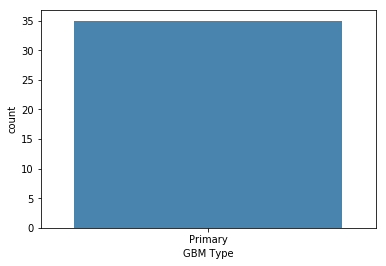

In [51]:
sns.countplot(x='GBM Type', 
              data=df_Own, 
              palette="Blues_d")

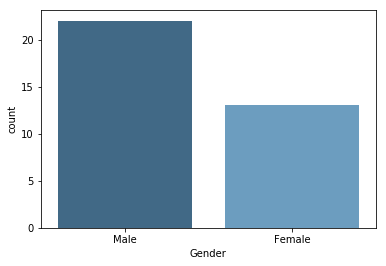

In [55]:
sns.countplot(x='Gender', 
              data=df_Own, 
              palette="Blues_d")

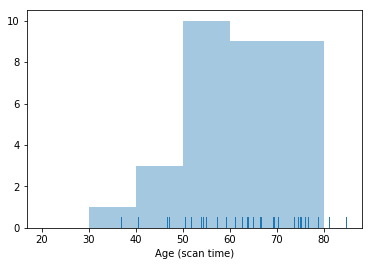

In [67]:
x = df_Own['Age (scan time)']
sns.distplot(x, kde=False, rug=True, bins=[20,30, 40, 50,60,70,80]);

In [60]:
c = 0
for i in list(TCGA_57.index):
    if i in list(TCGA_35.index):
        c +=1
print(c)

34
